In [1]:
#importing libraries
import numpy as np
import pandas as pd

In [2]:
#loading data
df=pd.read_csv('supermarket_sales.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
#adding column 'Sales' to the dataframe
def df1(df):
    df['Sales']=df['Quantity']*df['Unit price']
    return df

In [5]:
df1=df1(df)

In [6]:
df1.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Sales
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,324.31
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,465.76
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,604.17


In [7]:
#log transformation of each variable since gross income, Sales, cogs had skewed distribution,
#rest of the variables were log transformed for consistency
df1['gross income']=np.log(df1['gross income'])
df1['Sales']=np.log(df1['Sales'])
df1['cogs']=np.log(df1['cogs'])
df1['Total']=np.log(df1['Total'])
df1['Tax 5%']=np.log(df1['Tax 5%'])

In [14]:
df1=df1.drop('Invoice ID',axis=1)
df1=df1.drop('Unit price',axis=1)
df1=df1.drop('Quantity',axis=1)
df1=df1.drop('Date',axis=1)
df1=df1.drop('Time',axis=1)
df1=df1.drop('Payment',axis=1)
df1=df1.drop('Rating',axis=1)

In [15]:
df1.head()

,Branch,City,Customer type,Gender,Product line,Tax 5%,Total,cogs,gross margin percentage,gross income,Sales
0,A,Yangon,Member,Female,Health and beauty,3.263524,6.308047,6.259256,4.761905,3.263524,6.259256
1,C,Naypyitaw,Normal,Female,Electronic accessories,1.340250,4.384773,4.335983,4.761905,1.340250,4.335983
2,A,Yangon,Normal,Male,Home and lifestyle,2.785968,5.830490,5.781700,4.761905,2.785968,5.781700
3,A,Yangon,Member,Male,Health and beauty,3.147938,6.192461,6.143670,4.761905,3.147938,6.143670
4,A,Yangon,Normal,Male,Sports and travel,3.408123,6.452646,6.403856,4.761905,3.408123,6.403856


In [16]:
#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

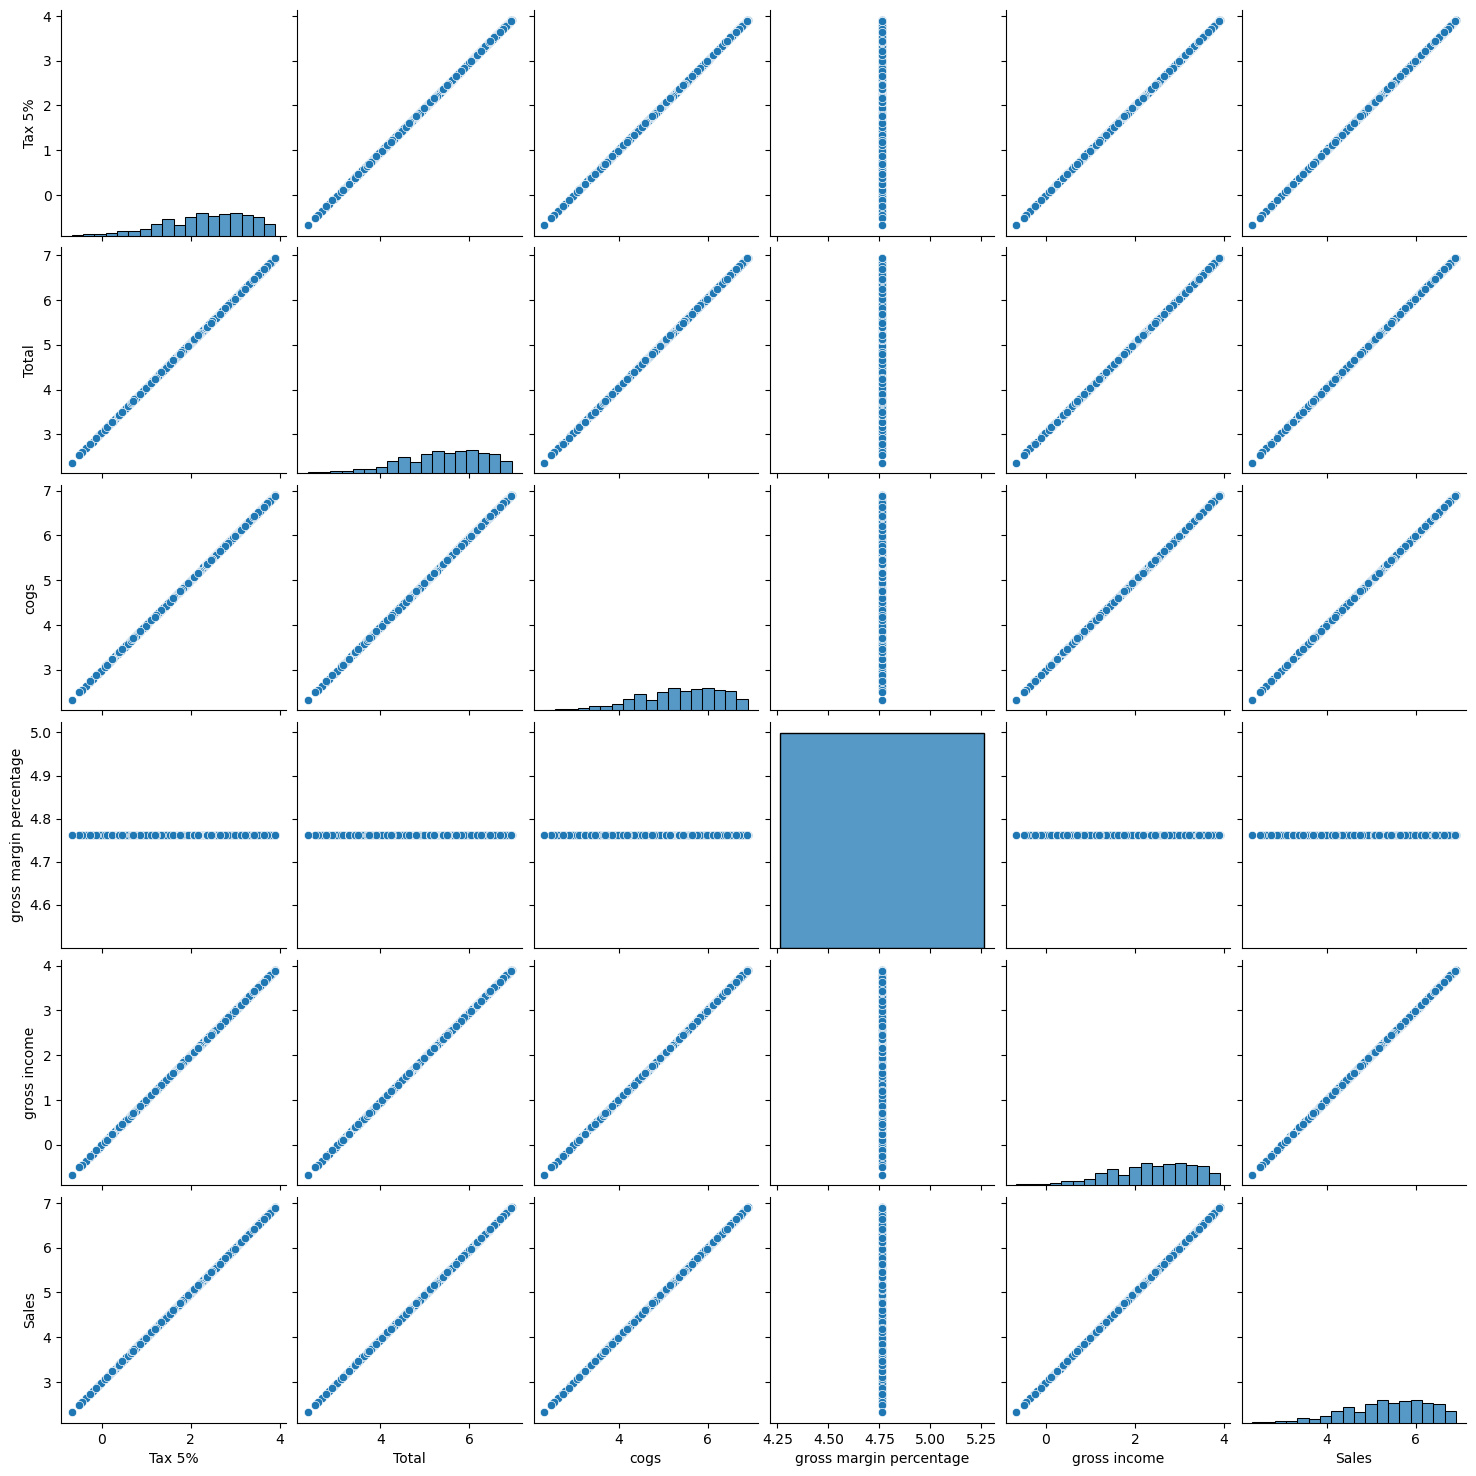

In [17]:
sns.pairplot(df1)

In [18]:
#LabelEncoding categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1["Branch"] = le.fit_transform(df1["Branch"])
df1["City"] = le.fit_transform(df1["City"])
df1["Customer type"] = le.fit_transform(df1["Customer type"])
df1["Gender"] = le.fit_transform(df1["Gender"])

In [19]:
#taking the product line column for health and beauty
df_Health_and_beauty=df1.where(df1['Product line']=='Health and beauty')
df_Health_and_beauty=df_Health_and_beauty.dropna()

In [20]:
df_Health_and_beauty.reset_index()
df_Health_and_beauty.head()

,Branch,City,Customer type,Gender,Product line,Tax 5%,Total,cogs,gross margin percentage,gross income,Sales
0,0.0,2.0,0.0,0.0,Health and beauty,3.263524,6.308047,6.259256,4.761905,3.263524,6.259256
3,0.0,2.0,0.0,1.0,Health and beauty,3.147938,6.192461,6.143670,4.761905,3.147938,6.143670
8,0.0,2.0,0.0,0.0,Health and beauty,1.288130,4.332653,4.283862,4.761905,1.288130,4.283862
14,0.0,2.0,1.0,0.0,Health and beauty,3.574871,6.619393,6.570603,4.761905,3.574871,6.570603
16,0.0,2.0,0.0,0.0,Health and beauty,3.183269,6.227792,6.179002,4.761905,3.183269,6.179002


In [21]:
X_HB = df_Health_and_beauty.drop("Product line",axis = 1 )
y_HB = df_Health_and_beauty["gross income"]

In [22]:
X_HB.head()

,Branch,City,Customer type,Gender,Tax 5%,Total,cogs,gross margin percentage,gross income,Sales
0,0.0,2.0,0.0,0.0,3.263524,6.308047,6.259256,4.761905,3.263524,6.259256
3,0.0,2.0,0.0,1.0,3.147938,6.192461,6.143670,4.761905,3.147938,6.143670
8,0.0,2.0,0.0,0.0,1.288130,4.332653,4.283862,4.761905,1.288130,4.283862
14,0.0,2.0,1.0,0.0,3.574871,6.619393,6.570603,4.761905,3.574871,6.570603
16,0.0,2.0,0.0,0.0,3.183269,6.227792,6.179002,4.761905,3.183269,6.179002


In [23]:
#Modelling using linear regression
from sklearn.model_selection import train_test_split
X_train_HB, X_test_HB, y_train_HB, y_test_HB = train_test_split(X_HB, y_HB, test_size=0.3, random_state=101)

In [24]:
from sklearn.linear_model import LinearRegression
lm_HB = LinearRegression()
lm_HB.fit(X_train_HB,y_train_HB)

LinearRegression()

In [25]:
#intercept
print(lm_HB.intercept_)

-0.923338702466908


In [26]:
#coefficients
coeff_df = pd.DataFrame(lm_HB.coef_,X_HB.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Branch,7.986120e-17
City,-6.191471e-17
Customer type,9.110880e-17
Gender,1.798921e-16
Tax 5%,2.313690e-01
Total,3.122181e-01
cogs,1.156675e-01
gross margin percentage,-1.505241e-01
gross income,2.262305e-01
Sales,1.145149e-01


In [27]:
#predicted values for the product line:health and beauty
predictions = lm_HB.predict(X_test_HB)
predictions

array([2.56648664, 1.62825967, 2.18829595, 2.54140512, 2.61849012,
       2.72932234, 2.9236722 , 1.52126222, 3.19109344, 3.14793821,
       3.26606471, 2.86234373, 2.83485905, 2.66116822, 1.78950693,
       2.81798026, 0.79885763, 2.39894018, 1.78791877, 2.83937082,
       3.21084365, 0.66808575, 2.5994251 , 1.5697611 , 1.51841851,
       3.72062034, 1.40499344, 2.8136107 , 3.81220267, 1.47075039,
       1.38303907, 2.88082635, 1.62363663, 2.16561924, 1.93888553,
       2.97499371, 3.50360354, 2.33277476, 2.17634137, 2.52684802,
       3.25694203, 3.78271127, 2.36297439, 2.56371783, 2.12823171,
       3.74490528])

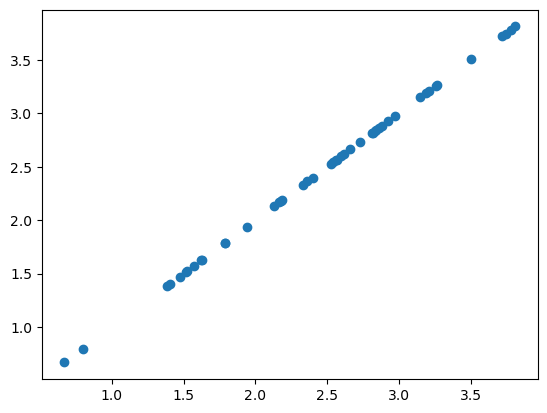

In [28]:
plt.scatter(y_test_HB,predictions)

In [29]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test_HB,predictions)

1.0

In [30]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test_HB, predictions))
print('MSE:', metrics.mean_squared_error(y_test_HB, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_HB, predictions)))

MAE: 4.296080399636475e-16
MSE: 2.9635875039892632e-31
RMSE: 5.443884186855249e-16


In [ ]:
#similarly done for other product lines....